# AIR QUALITY PREDICTION FOR SMART CITIES USING MACHINE LEARNING

# DATA COLLECTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
city = pd.read_csv(r'C:\Users\arshad\Music\Major_Project\new.csv')
city.drop(['AQI_Bucket'],axis=1,inplace=True)

In [3]:
city.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [4]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  object 
 1   Date     29531 non-null  object 
 2   PM2.5    24933 non-null  float64
 3   PM10     18391 non-null  float64
 4   NO       25949 non-null  float64
 5   NO2      25946 non-null  float64
 6   NOx      25346 non-null  float64
 7   NH3      19203 non-null  float64
 8   CO       27472 non-null  float64
 9   SO2      25677 non-null  float64
 10  O3       25509 non-null  float64
 11  Benzene  23908 non-null  float64
 12  Toluene  21490 non-null  float64
 13  Xylene   11422 non-null  float64
 14  AQI      24850 non-null  float64
dtypes: float64(13), object(2)
memory usage: 3.4+ MB


In [5]:
city=city.fillna(0)

#  Checking for Missing Values in the data


In [6]:
def getMissingValues(data):
    missing_val = data.isnull().sum()
    missing_val_percentage = 100 * data.isnull().sum() / len(data)
    missin_values_array = pd.concat([missing_val, missing_val_percentage], axis=1)
    missin_values_array = missin_values_array.rename(columns = 
                                                     {0 : 'Missing Values', 1 : '% of Total Values'})
    missin_values_array = missin_values_array[
        missin_values_array.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    return missin_values_array

In [7]:
def mergeColumns(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data['BTX'] = data['Benzene'] + data['Toluene'] + data['Xylene']
    data.drop(['Benzene','Toluene','Xylene'], axis=1)
    data['Particulate_Matter'] = data['PM2.5'] + data['PM10']
    return data

In [8]:
def subsetColumns(data):
    pollutants = ['Particulate_Matter', 'NO2', 'CO','SO2', 'O3', 'BTX']
    columns =  ['Date', 'City', 'AQI'] + pollutants
    data = data[columns]
    return data, pollutants

In [9]:
def handleMissingValues(data):
    missing_values = getMissingValues(data)
    updatedCityData = mergeColumns(data)
    updatedCityData, pollutants = subsetColumns(updatedCityData)
    return updatedCityData, pollutants

In [10]:
updatedCityData, newColumns = handleMissingValues(city)

In [11]:
updatedCityData.fillna(0)


,Date,City,AQI,Particulate_Matter,NO2,CO,SO2,O3,BTX
0,2015-01-01,Ahmedabad,0.0,0.00,18.22,0.92,27.64,133.36,0.02
1,2015-01-02,Ahmedabad,0.0,0.00,15.69,0.97,24.55,34.06,12.95
2,2015-01-03,Ahmedabad,0.0,0.00,19.30,17.40,29.07,30.70,25.45
3,2015-01-04,Ahmedabad,0.0,0.00,18.48,1.70,18.59,36.08,15.57
4,2015-01-05,Ahmedabad,0.0,0.00,21.42,22.10,39.33,39.31,28.68
...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,Visakhapatnam,41.0,65.96,25.06,0.47,8.55,23.30,15.04
29527,2020-06-28,Visakhapatnam,70.0,98.47,26.06,0.52,12.72,30.14,3.33
29528,2020-06-29,Visakhapatnam,68.0,88.64,29.53,0.48,8.42,30.96,0.02
29529,2020-06-30,Visakhapatnam,54.0,66.61,29.26,0.52,9.84,28.30,0.00


In [12]:
def visualisePollutants(udata, columns):
    data = udata.copy()
    data.set_index('Date',inplace=True)
    axes = data[columns].plot(marker='.', linestyle='None', figsize=(15, 15), subplots=True)
    for ax in axes:
        ax.set_xlabel('Years')
        ax.set_ylabel('ug/m3')

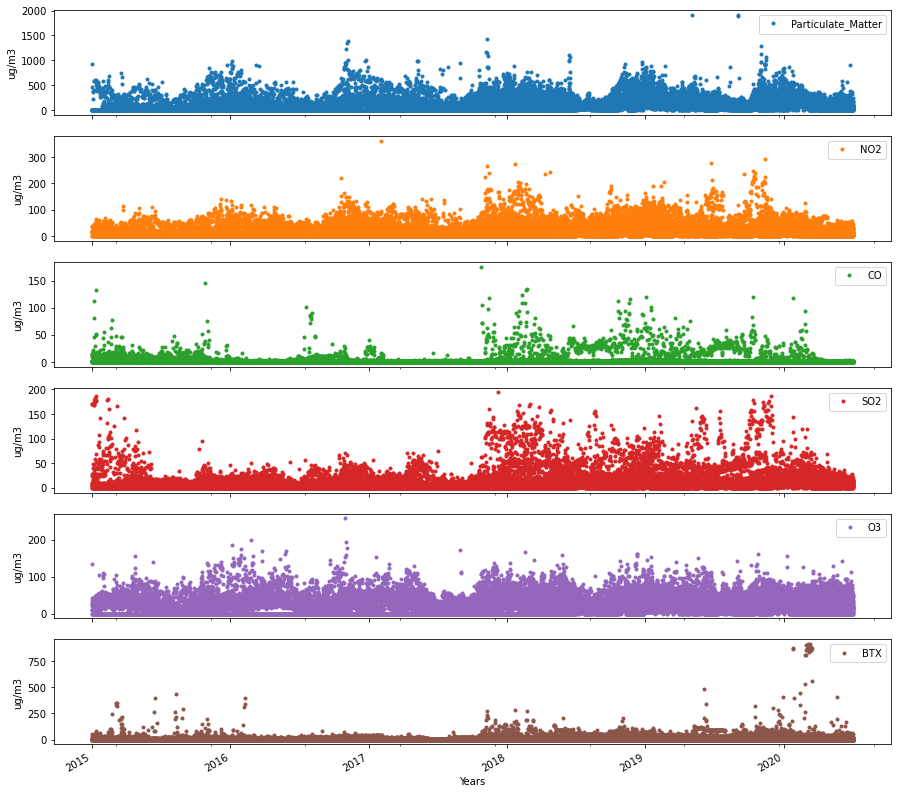

In [13]:
visualisePollutants(city, newColumns)

In [14]:
updatedCityData.groupby('City')[['Particulate_Matter','NO2','CO','SO2','O3','BTX']].mean()

,Particulate_Matter,NO2,CO,SO2,O3,BTX
City,,,,,,
Ahmedabad,69.857023,41.162130,15.465789,37.651747,25.804759,28.408278
Aizawl,39.973009,0.388496,0.283628,7.378053,3.412389,17.394248
Amaravati,107.375478,20.893239,0.563859,13.283796,35.910757,2.936835
Amritsar,158.911957,17.854652,0.516986,7.027690,20.304881,12.096257
Bengaluru,101.543315,27.911434,1.828566,5.502539,30.512185,7.329034
Bhopal,164.108962,30.369170,0.852976,12.657958,57.987163,0.000000
Brajrajnagar,152.730991,12.399211,1.510704,7.770256,13.007196,3.949424
Chandigarh,124.757336,11.458289,0.631349,10.159375,20.047204,9.087533
Chennai,56.934420,16.555545,1.054067,7.736028,31.652504,3.735520


# CALCULATION OF AQI INDEX BASED ON THE POLLUTANT LEVELS

In [15]:
def cal_aqi(SO2,NO2,Particulate_Matter,CO,O3,BTX):
    aqi=0
    if(SO2>NO2 and SO2>Particulate_Matter and SO2>CO and SO2>O3 and SO2>BTX):
     aqi=SO2
    if(NO2>SO2 and NO2>Particulate_Matter and NO2>CO and NO2>O3 and NO2>BTX):
     aqi=NO2
    if(Particulate_Matter>SO2 and Particulate_Matter>NO2 and Particulate_Matter>CO and Particulate_Matter>O3 and Particulate_Matter>BTX ):
     aqi=Particulate_Matter
    if(CO>SO2 and CO>NO2 and CO>Particulate_Matter and CO>O3 and CO>BTX):
     aqi=CO
    if(O3>SO2 and O3>NO2 and O3>Particulate_Matter and O3>CO and O3>BTX):
     aqi=O3
    if(BTX>SO2 and BTX>NO2 and BTX>Particulate_Matter and BTX>O3 and BTX>CO):
     aqi=BTX
    return aqi

updatedCityData['AQI_INDEX']=updatedCityData.apply(lambda x:cal_aqi(x['SO2'],x['NO2'],x['Particulate_Matter'],x['CO'],x['O3'],x['BTX']),axis=1)
city_data=updatedCityData[['City','Date','SO2','NO2','Particulate_Matter','CO','O3','BTX','AQI_INDEX']]
city_data

,City,Date,SO2,NO2,Particulate_Matter,CO,O3,BTX,AQI_INDEX
0,Ahmedabad,2015-01-01,27.64,18.22,0.00,0.92,133.36,0.02,133.36
1,Ahmedabad,2015-01-02,24.55,15.69,0.00,0.97,34.06,12.95,34.06
2,Ahmedabad,2015-01-03,29.07,19.30,0.00,17.40,30.70,25.45,30.70
3,Ahmedabad,2015-01-04,18.59,18.48,0.00,1.70,36.08,15.57,36.08
4,Ahmedabad,2015-01-05,39.33,21.42,0.00,22.10,39.31,28.68,39.33
...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,8.55,25.06,65.96,0.47,23.30,15.04,65.96
29527,Visakhapatnam,2020-06-28,12.72,26.06,98.47,0.52,30.14,3.33,98.47
29528,Visakhapatnam,2020-06-29,8.42,29.53,88.64,0.48,30.96,0.02,88.64
29529,Visakhapatnam,2020-06-30,9.84,29.26,66.61,0.52,28.30,0.00,66.61


# CALCULATION OF AQI_RANGE BASED ON THE AQI INDEX

In [16]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=150:
        return "Unhealthy for Kids"
    elif x>150 and x<=200:
        return "Unhealthy"
    elif x>200 and x<=300:                                #what is SPMI an dRSPMI SOI why do we need it what is AQI and itsrange
        return "Very Unhealthy"
    elif x>300:
        return "Hazardous"

city_data['AQI_RANGE'] = city_data['AQI_INDEX'] .apply(AQI_Range)
city_data.head(150)

,City,Date,SO2,NO2,Particulate_Matter,CO,O3,BTX,AQI_INDEX,AQI_RANGE
0,Ahmedabad,2015-01-01,27.64,18.22,0.00,0.92,133.36,0.02,133.36,Unhealthy for Kids
1,Ahmedabad,2015-01-02,24.55,15.69,0.00,0.97,34.06,12.95,34.06,Good
2,Ahmedabad,2015-01-03,29.07,19.30,0.00,17.40,30.70,25.45,30.70,Good
3,Ahmedabad,2015-01-04,18.59,18.48,0.00,1.70,36.08,15.57,36.08,Good
4,Ahmedabad,2015-01-05,39.33,21.42,0.00,22.10,39.31,28.68,39.33,Good
...,...,...,...,...,...,...,...,...,...,...
145,Ahmedabad,2015-05-26,14.46,14.43,53.66,4.23,45.64,12.32,53.66,Moderate
146,Ahmedabad,2015-05-27,12.85,13.73,45.49,4.26,71.85,11.82,71.85,Moderate
147,Ahmedabad,2015-05-28,14.91,16.61,60.86,5.27,41.19,18.75,60.86,Moderate
148,Ahmedabad,2015-05-29,15.33,17.87,51.93,13.71,12.88,36.06,51.93,Moderate


# Effect of Lockdown on AQI


# a. AQI in the year 2020 - City-wise

In [17]:
cities = ['Delhi','Lucknow','Bengaluru','Hyderabad']
filtered_city_day = city_data[city_data['Date'] <= '2020-12-31']
AQI_INDEX = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI_INDEX','AQI_RANGE']]

In [18]:
AQI_pivot = AQI_INDEX.pivot(index='Date', columns='City', values='AQI_INDEX')
AQI_pivot.fillna(method='bfill',inplace=True)

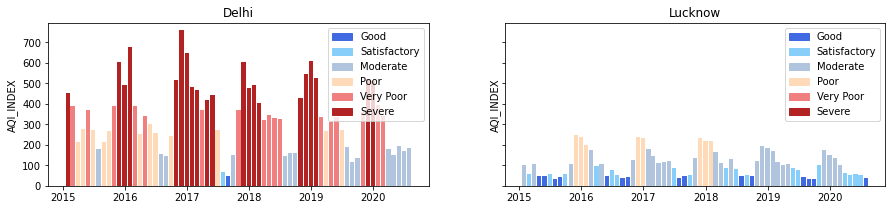

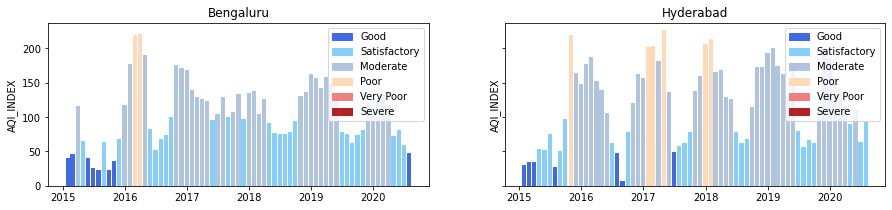

In [19]:
AQI_2020 = AQI_pivot[AQI_pivot.index <'2020-12-31']
AQI_2020 = AQI_2020.resample('M').mean()
# AQI_2020.set_index('Date')
# aqi = aqi.to_numpy()

def getColorBar(city):
    col = []
    for val in AQI_2020[city]:
        if val < 50:
            col.append('royalblue')
        elif val > 50 and val < 101:
            col.append('lightskyblue') #cornflowerblue
        elif val > 100 and val < 201:
            col.append('lightsteelblue')
        elif val > 200 and val < 301:
            col.append('peachpuff')
        elif val > 300 and val < 401:
            col.append('lightcoral')
        else:
            col.append('firebrick')
    return col

for i in range(0, 4, 2):
    city_1 = cities[i]
    city_2 = cities[i+1]
    fig, ((ax1, ax2)) =  plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,3))
#     ax = fig.add_axes([0,0,1,1])
    ax1.bar(AQI_2020.index, AQI_2020[city_1], width = 25, color=getColorBar(city_1))
    ax1.title.set_text(city_1)
    ax1.set_ylabel('AQI_INDEX')
    
    colors = {'Good':'royalblue', 'Satisfactory':'lightskyblue', 'Moderate':'lightsteelblue', 'Poor':'peachpuff', 'Very Poor':'lightcoral', 'Severe':'firebrick'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    ax1.legend(handles, labels, loc='upper right')
    
    ax2.bar(AQI_2020.index, AQI_2020[city_2], width = 25, color=getColorBar(city_2))
    ax2.title.set_text(city_2)
    ax2.set_ylabel('AQI_INDEX')
    colors = {'Good':'royalblue', 'Satisfactory':'lightskyblue', 'Moderate':'lightsteelblue', 'Poor':'peachpuff', 'Very Poor':'lightcoral', 'Severe':'firebrick'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    ax2.legend(handles, labels, loc='upper right')
    


# b.AQI before and after LOCKDOWN

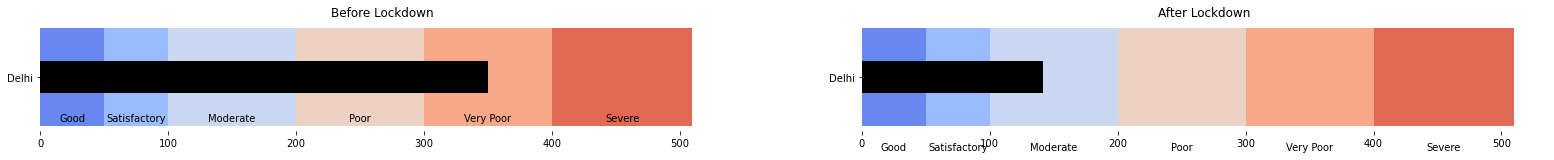

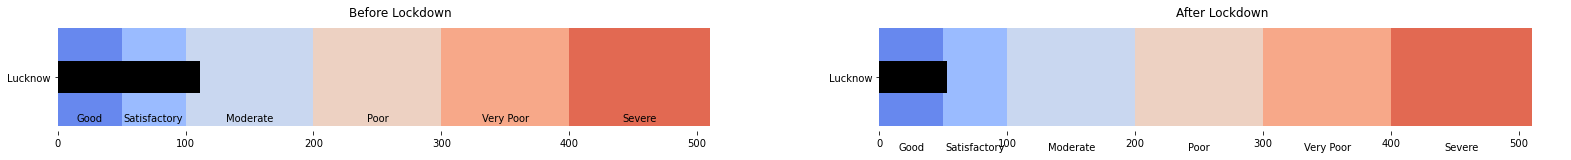

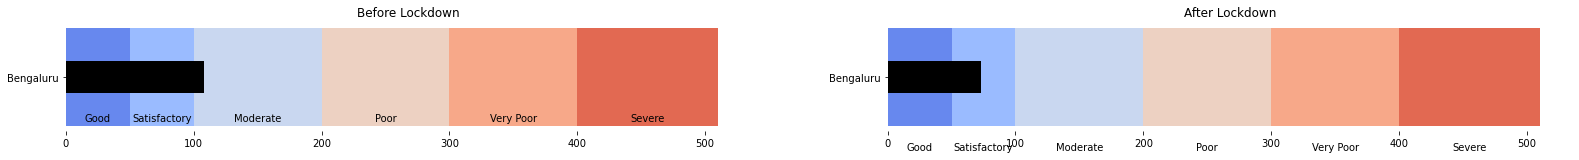

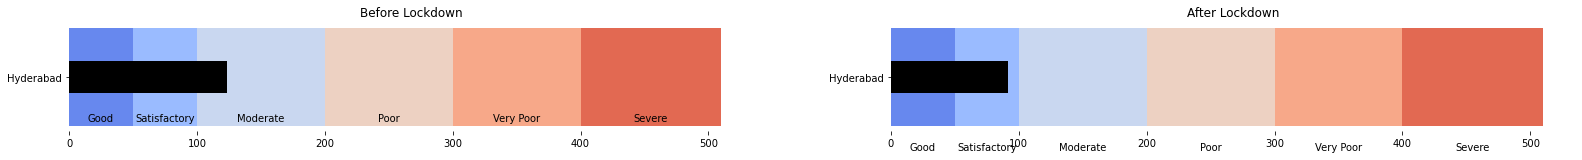

In [20]:
AQI_beforeLockdown = AQI_pivot['2015-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']
limits = [50, 100, 200, 300, 400, 510]
# palette = sns.light_palette("Spectral", len(limits), reverse = True)
palette = sns.color_palette("coolwarm", len(limits))
for city in cities:
    aqi_before = AQI_beforeLockdown[city].mean()
    aqi_after = AQI_afterLockdown[city].mean()
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(27, 2))
    ax1.set_yticks([1])
    ax1.set_yticklabels([city])
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    prev_limit = 0
    for idx, lim in enumerate(limits):
        ax1.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
        prev_limit = lim

    ax1.barh([1], aqi_before, color='black', height=5)
    
    # after lockdown
    ax2.set_yticks([1])
    ax2.set_yticklabels([city])
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    prev_limit = 0
    for idx, lim in enumerate(limits):
        ax2.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
        prev_limit = lim

    ax2.barh([1], aqi_after, color='black', height=5)
    
    ax1.set_title('Before Lockdown')
    ax2.set_title('After Lockdown')
    
    rects = ax1.patches
    labels=["Good", "Satisfactory", "Moderate", "Poor", 'Very Poor', 'Severe']
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax1.text(
            rect.get_x() + rect.get_width()/2 ,
            -height * .4,
            label,
            ha='center',
            va='bottom',
            color='black')
        ax2.text(
            rect.get_x() + rect.get_width() / 2,
            -height * .7,
            label,
            ha='center',
            va='bottom',
            color='black')


# Perform Feature Scaling using Min-Max Scaler
Min-Max Scaling Feature for normalizing the data to a range of (a-b)


In [21]:
indep_var=city_data[['SO2','NO2','Particulate_Matter','CO','O3','BTX']]
depend_var= city_data['AQI_RANGE']

In [22]:
from sklearn.preprocessing import MinMaxScaler
scale1=MinMaxScaler()
Xminmax=scale1.fit_transform(indep_var)
Xminmax

array([[1.42577118e-01, 5.03023108e-02, 0.00000000e+00, 5.23292190e-03,
        5.17440733e-01, 2.19852699e-05],
       [1.26637780e-01, 4.33174126e-02, 0.00000000e+00, 5.51731983e-03,
        1.32153804e-01, 1.42354622e-02],
       [1.49953575e-01, 5.32840065e-02, 0.00000000e+00, 9.89704795e-02,
        1.19116905e-01, 2.79762559e-02],
       ...,
       [4.34334056e-02, 8.15272908e-02, 4.62468761e-02, 2.73022012e-03,
        1.20125713e-01, 2.19852699e-05],
       [5.07582792e-02, 8.07818669e-02, 3.47529830e-02, 2.95773847e-03,
        1.09804835e-01, 0.00000000e+00],
       [1.08325596e-02, 7.41282681e-02, 4.22607961e-02, 3.35589557e-03,
        6.61545028e-02, 0.00000000e+00]])

# PREDICTION OF AIR QUALITY USING SVM,KNN,RANDOM FOREST ALGORITHM

# RANDOM FOREST ALGORITHM

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [24]:
X_train, X_test, y_train, y_test = train_test_split(indep_var,depend_var, test_size=0.33, random_state=42)


In [25]:
X_train

,SO2,NO2,Particulate_Matter,CO,O3,BTX
3894,24.33,22.68,144.57,1.42,26.36,14.42
8404,6.88,7.48,59.34,0.96,36.62,7.08
23229,16.84,29.55,171.14,2.13,41.35,1.57
13594,14.56,13.99,143.01,0.39,31.28,0.00
4934,4.77,30.02,102.73,0.61,0.00,0.00
...,...,...,...,...,...,...
21575,4.19,18.64,21.75,0.91,26.03,4.66
5390,3.20,42.23,112.60,1.04,25.89,0.00
860,0.00,0.00,0.00,0.00,0.00,0.00
15795,5.92,31.21,131.90,0.70,48.88,5.47


In [26]:
y_train

3894     Unhealthy for Kids
8404               Moderate
23229             Unhealthy
13594    Unhealthy for Kids
4934     Unhealthy for Kids
                ...        
21575                  Good
5390     Unhealthy for Kids
860                    Good
15795    Unhealthy for Kids
23654             Unhealthy
Name: AQI_RANGE, Length: 19785, dtype: object

In [27]:
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
prediction = model1.predict(X_test)
prediction

array(['Good', 'Good', 'Moderate', ..., 'Good', 'Unhealthy',
       'Very Unhealthy'], dtype=object)

In [29]:
model1.score(X_test,y_test)

0.9951775087215268

In [30]:
result=model1.predict([[123,45.6,56,78.9,44,9.5]])
result

array(['Unhealthy for Kids'], dtype=object)

# SVM (SUPPORT VECTOR MACHINE) ALGORITHM

In [31]:
from sklearn.svm import SVC

In [32]:
model3=SVC(kernel="rbf",random_state=0)

In [33]:
model3.fit(X_train,y_train)

SVC(random_state=0)

In [34]:
model3.score(X_test,y_test)

0.9690129283808742

In [35]:
model3.predict([[1.9,5.3,33.3,1.45,7.6,15]])

array(['Good'], dtype=object)

# KNN (K-NEAREST NEIGHBOURS) ALGORITHM

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()

In [37]:
model2.fit(X_train,y_train)

KNeighborsClassifier()

In [38]:
model2.score(X_test,y_test)

0.9681920788015597

In [39]:
answer = model2.predict([[96.8,31.2,541,205,4.1,7.25]])

In [40]:
print("The air quality is {}".format(answer[0]))

The air quality is Hazardous


In [52]:
import pickle


pickle.dump(model1, open('majorproject.pkl', 'wb'))

In [53]:
X_test

,SO2,NO2,Particulate_Matter,CO,O3,BTX
22593,0.00,0.00,0.00,0.00,0.00,0.00
22459,0.00,0.00,0.00,0.00,0.00,0.00
24213,5.13,17.05,58.50,1.14,24.20,1.09
25301,39.86,5.45,78.57,1.33,71.68,25.17
20886,9.71,50.59,200.80,1.22,42.18,1.34
...,...,...,...,...,...,...
7139,6.70,16.16,104.11,2.92,14.34,0.00
6973,13.89,19.90,173.60,1.51,5.68,14.71
15509,3.09,9.50,23.35,0.14,26.17,0.68
18843,18.60,10.49,150.20,0.37,29.40,0.00


In [54]:
X_test.columns

Index(['SO2', 'NO2', 'Particulate_Matter', 'CO', 'O3', 'BTX'], dtype='object')